In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

import torch
from density_estimation import * 
from variational_inference import *
from utils.visual import * 
from targets import *

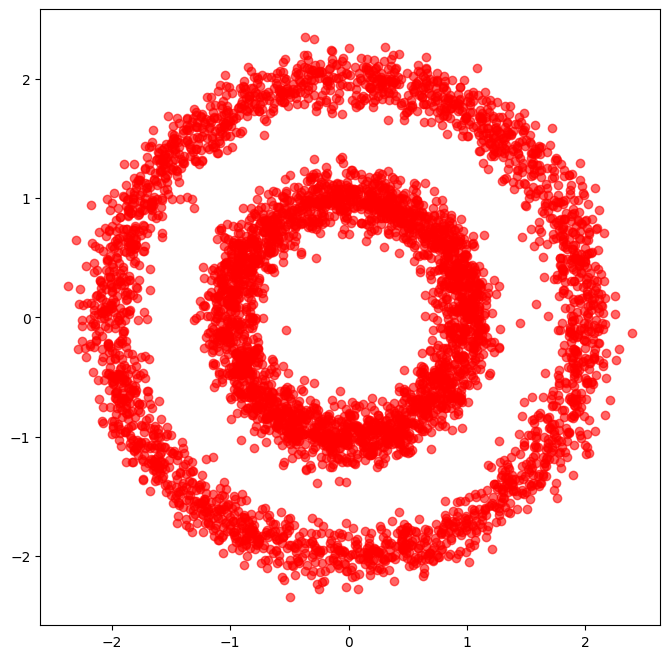

In [2]:
target = TwoCircles()
target.visual()

..\density_estimation\mixture_dirichlet_process.py:68: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
  0%|                                                                                                                            | 0/100 [00:00<?, ?it/s]..\density_estimation\mixture_dirichlet_process.py:83: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.plot_assignation(ax)
  3%|███▍                                                                                                                | 3/100 [00:21<11:28,  7.10s/it]


KeyboardInterrupt: 

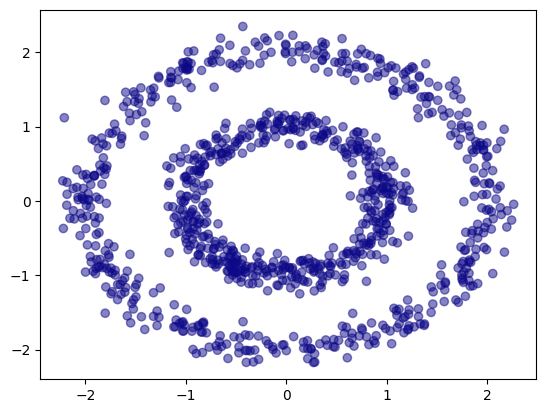

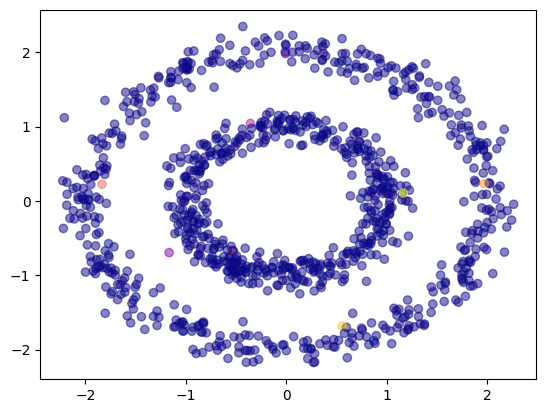

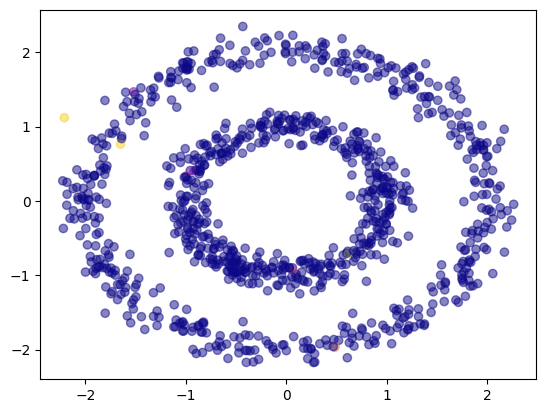

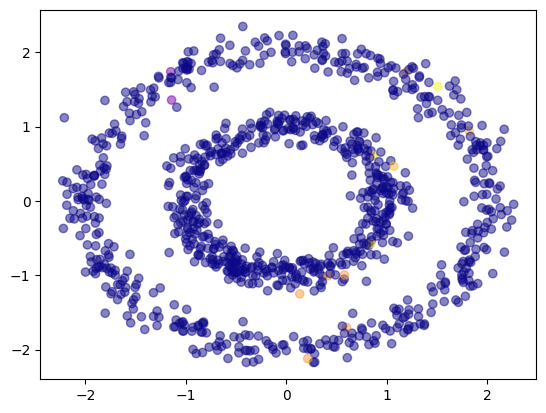

In [11]:
mixt_dirichlet = MixtureDirichletProcess(target.sample([1000]))
mixt_dirichlet.train(100,verbose = True,visual = True)